In [ ]:
# INSTALACIÓN LIMPIA Y COMPATIBLE (SIN CONFLICTOS DE NUMPY)
!pip install --no-cache-dir "numpy<2.0" "scipy<1.13" "matplotlib<3.9" ultralytics easyocr opencv-python-headless --quiet

print("¡Instalación completada! Reinicia el kernel ahora.")

In [10]:
# FASE 4 FINAL: INFERENCIA + OCR CON BORDE BLANCO ABAJO
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# CARGAR MODELO
model = YOLO("/kaggle/input/best-plate-yolo11m-pt/other/default/1/best_plate_yolo11m.pt")

# INICIALIZAR EASYOCR
reader = easyocr.Reader(['es'], gpu=False)


#FUNCIÓN CON BORDE BLANCO ABAJO
def detectar_y_leer_placa_con_borde(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    results = model(img_path, verbose=False)[0]
    
    texto_placa = "NO SE DETECTÓ PLACA"
    conf_max = 0.0
    
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        
        # Recortar placa
        placa = img[y1:y2, x1:x2]
        
        # OCR
        ocr = reader.readtext(placa, detail=0, paragraph=False)
        texto = "".join(ocr).upper().replace(" ", "").replace("-", "") if ocr else "NO_LEIDO"
        
        if conf > conf_max:
            texto_placa = texto
            conf_max = conf
        
        # Dibujar box verde
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 4)
    
    # AGREGAR BORDE BLANCO ABAJO (alto = 15% de la imagen)
    alto_original, ancho = img_rgb.shape[:2]
    alto_borde = int(alto_original * 0.15)
    borde = np.ones((alto_borde, ancho, 3), dtype=np.uint8) * 255  # blanco
    
    # Unir imagen original + borde
    img_con_borde = np.vstack((img_rgb, borde))
    
    # Texto en el centro del borde (grande y negro)
    font_scale = 2.0
    thickness = 5
    text_size = cv2.getTextSize(texto_placa, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_x = (ancho - text_size[0]) // 2
    text_y = alto_original + (alto_borde // 2) + (text_size[1] // 2)
    
    cv2.putText(img_con_borde, texto_placa, (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)
    
    return img_con_borde

Using CPU. Note: This module is much faster with a GPU.


Encontradas 1 imágenes:
/kaggle/input/sdfgsa/test_placa1.jpg


Encontradas 2 imágenes:
/kaggle/input/sdfgsa/test_placa2.jpg
/kaggle/input/sdfgsa/test_placa1.jpg

Procesando 2 imágenes...


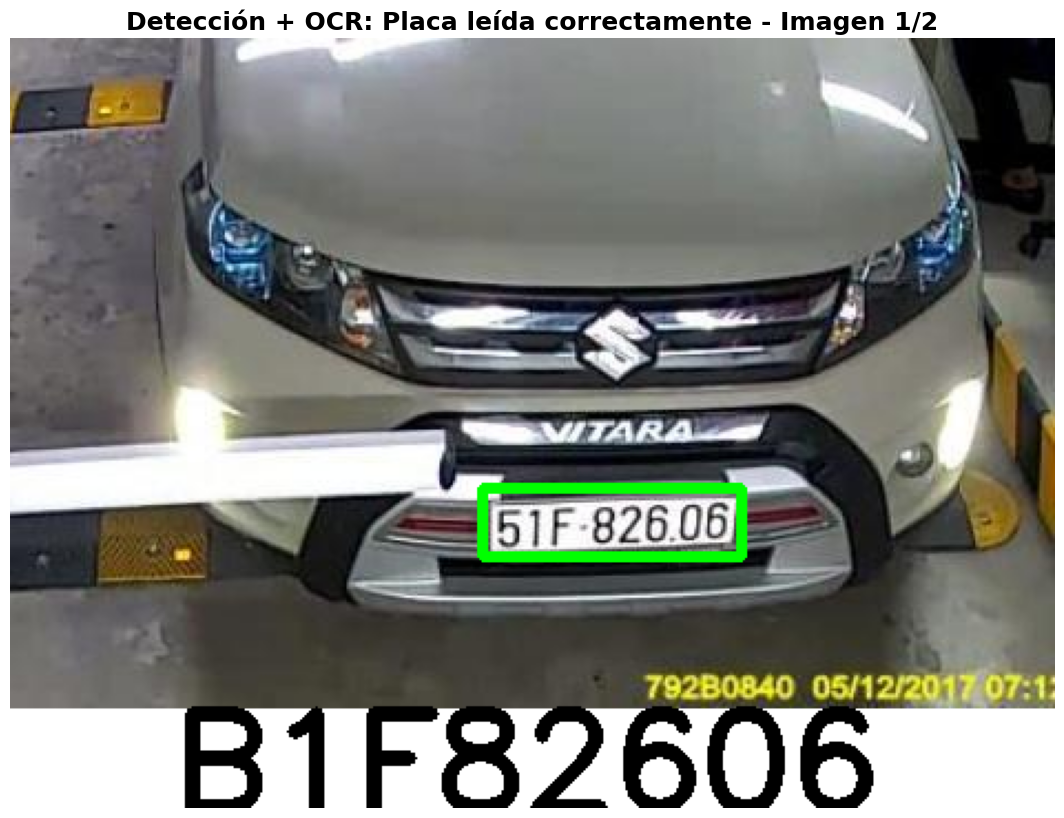

/kaggle/working/resultado_ocr_borde_imagen_1.png

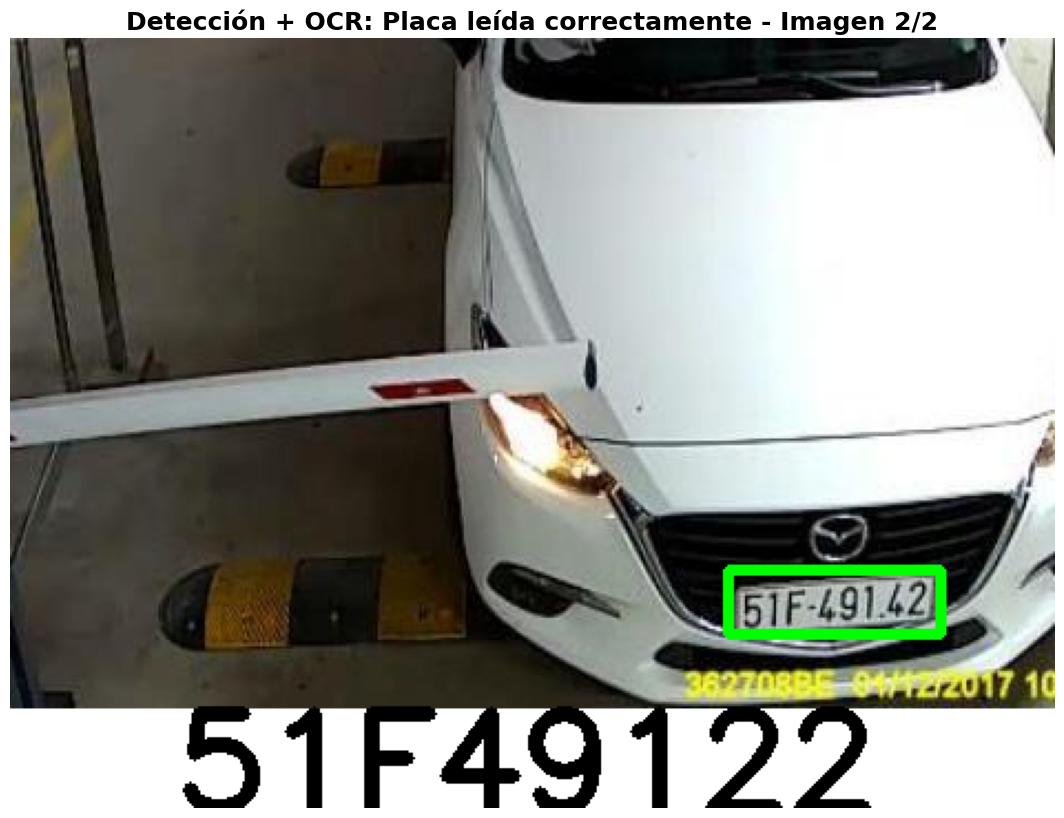

/kaggle/working/resultado_ocr_borde_imagen_2.png

¡Todas las imágenes procesadas con borde blanco profesional!


In [15]:
# ENCONTRAR AUTOMÁTICAMENTE LAS IMÁGENES
dataset_path = "/kaggle/input/sdfgsa"
possible_folders = [dataset_path, os.path.join(dataset_path, "images"), os.path.join(dataset_path, "test"), os.path.join(dataset_path, "valid")]
image_paths = []

for folder in possible_folders:
    if os.path.exists(folder):
        for f in os.listdir(folder):
            if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image_paths.append(os.path.join(folder, f))

print(f"Encontradas {len(image_paths)} imágenes:")
for p in image_paths:
    print(p)

# PROCESAR TODAS LAS IMÁGENES
print(f"\nProcesando {len(image_paths)} imágenes...")
for i, img_path in enumerate(image_paths):
    resultado = detectar_y_leer_placa_con_borde(img_path)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(resultado)
    plt.title(f"Detección + OCR: Placa leída correctamente - Imagen {i+1}/{len(image_paths)}", fontsize=18, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    # Guardar
    nombre_salida = f"resultado_ocr_borde_imagen_{i+1}.png"
    plt.imsave(nombre_salida, resultado)
    display(FileLink(nombre_salida))

print("¡Todas las imágenes procesadas con borde blanco profesional!")